# Model Creation and Tuning

In [4]:
!pip install xgboost

     |████████████████████████████████| 173.6 MB 2.2 kB/s  eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import sklearn
import os 
import sys
import json

In [35]:
import pickle

In [2]:
from sklearn.metrics import *

In [6]:
from sklearn.model_selection import *
from sklearn.metrics import *

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

In [5]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Data Preprocessing

In [8]:
data = pd.read_csv('processed/training_df.csv')

In [10]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [12]:
data.columns

Index(['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [15]:
label = 'averageRating'
numerical_cols = ['runtimeMinutes', 'numVotes','cast_mean', 
                  'cast_std', 'cast_max', 'crew_mean', 'crew_std',
                'crew_max', 'cast_exp', 'crew_exp', 'numRegions']
ordinal_cols = ['startYear']

In [16]:
def scaler(data, numerical_cols, ordinal_cols):
    if numerical_cols:
        ss  = StandardScaler()
        data.loc[:, numerical_cols] = ss.fit_transform(data[numerical_cols])
    if ordinal_cols:
        os = OrdinalEncoder()
        data.loc[:, ordinal_cols] = ss.fit_transform(data[ordinal_cols])
        
    return data

In [17]:
data_scaled = scaler(data, numerical_cols, ordinal_cols)

In [18]:
data_scaled

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,cast_mean,cast_std,cast_max,crew_mean,crew_std,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,-1.319724,0.068700,4.5,-0.095872,-1.947168,-0.997854,-3.015751,-0.986950,1.005087,...,0,0,0,0,0,0,0,0,0,0
1,0,-1.319724,-0.166455,6.0,-0.072000,-0.208452,-0.997854,-1.450210,-0.472322,-0.953246,...,0,0,0,0,0,0,0,0,0,0
2,0,-1.319724,-0.009685,4.6,-0.095775,-1.160606,-0.997854,-1.737226,-1.630350,-0.408200,...,0,0,0,0,0,0,0,0,0,0
3,0,-1.319724,0.037346,4.5,-0.095581,-1.599425,-0.997854,-2.389535,-1.668844,-0.953246,...,0,0,0,0,0,0,0,0,0,0
4,0,-1.319724,0.303856,3.8,-0.095549,-0.976385,1.338778,-0.771809,-0.473268,1.763490,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323829,0,1.161934,0.005992,6.4,0.047136,-0.035898,-0.997854,0.193608,0.164157,-0.953246,...,0,0,0,0,0,0,0,0,0,0
323830,0,1.112301,0.013831,3.8,-0.095872,-1.897582,-0.997854,-2.406930,-1.755456,1.167940,...,0,0,0,0,0,0,0,0,1,0
323831,0,1.112301,-0.636766,9.3,-0.095775,3.616722,-0.997854,1.993980,3.566343,-0.953246,...,0,0,0,0,0,0,0,0,0,0
323832,0,1.112301,0.248986,8.3,-0.096130,1.261004,-0.997854,0.950286,1.006749,-0.953246,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X = data_scaled[['isAdult', 'startYear', 'runtimeMinutes', 'numVotes',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western']].values

In [21]:
y = data[label]

In [22]:
X.shape, y.shape

((323834, 41), (323834,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [29]:
print(f"Xtrain shape: {X_train.shape}")
print(f"Xtrain shape: {X_test.shape}")
print(f"Xtrain shape: {y_train.shape}")
print(f"Xtrain shape: {y_test.shape}")

Xtrain shape: (226683, 41)
Xtrain shape: (97151, 41)
Xtrain shape: (226683,)
Xtrain shape: (97151,)


## Baseline Linear Model

In [30]:
lr = LinearRegression(n_jobs=-1)

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [33]:

lr.score(X_train, y_train)

0.7430537794248169

In [34]:
lr.score(X_test, y_test)

0.7456695128983963

## Baseline Random Forest

In [36]:
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
rf_model.score(X_train, y_train)

0.9759075492103017

In [38]:
rf_model.score(X_test, y_test)

0.830430301030396

In [39]:
rf_model.feature_importances_

array([2.45319173e-04, 1.33528929e-02, 1.32591878e-02, 1.82988987e-02,
       2.03452145e-01, 3.26198968e-02, 3.48809225e-02, 5.81235453e-01,
       2.37546969e-02, 2.65316066e-02, 1.46335730e-02, 1.50484753e-02,
       7.44189419e-03, 1.07208672e-03, 2.70124295e-04, 8.41037091e-04,
       3.67760546e-04, 4.15762509e-04, 1.50786270e-03, 8.75111623e-04,
       1.15073636e-03, 1.71793956e-03, 5.73897828e-04, 4.81125858e-04,
       1.80650029e-05, 2.05219258e-07, 3.89712630e-04, 7.91241762e-04,
       4.38633565e-04, 4.71487073e-04, 4.62407479e-04, 5.36226420e-05,
       2.83866000e-05, 1.00515746e-03, 6.00836522e-04, 1.63999764e-07,
       2.37333054e-04, 7.86576968e-07, 8.04496262e-04, 3.60064240e-04,
       3.08992483e-04])

In [40]:
train_cols = ['isAdult', 'startYear', 'runtimeMinutes', 'numVotes',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western']

In [45]:
imp = pd.DataFrame.from_dict({"importances": rf_model.feature_importances_},orient = 'columns')

In [46]:
imp.index = train_cols

In [52]:
imp = imp.sort_values(by = 'importances', ascending=False)

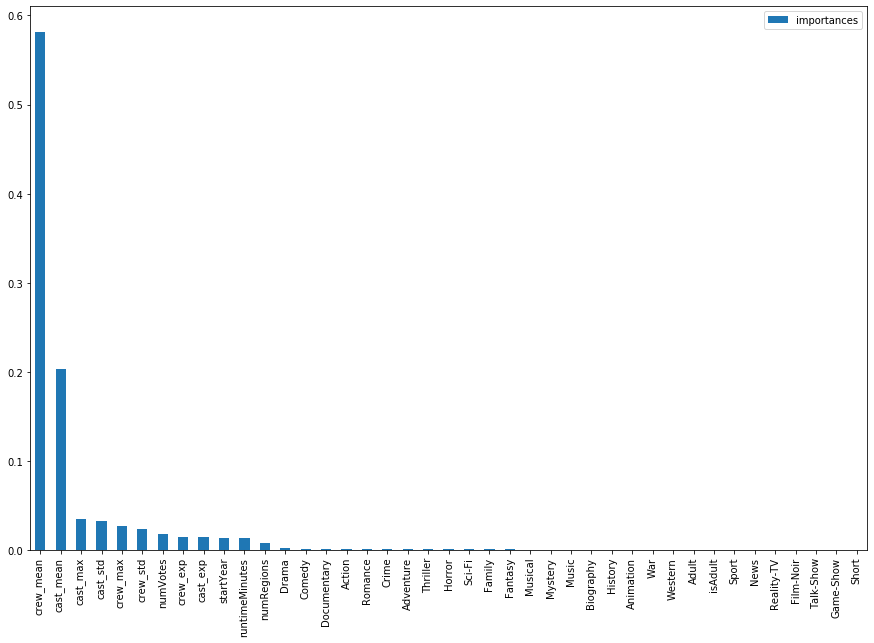

In [54]:
imp.plot.bar(figsize = (15, 10))

## Baseline XGB model


In [56]:
xgb = XGBRegressor(subsample=0.8, n_jobs=-1)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
xgb.score(X_train, y_train)

0.8528961559157758

In [58]:
xgb.score(X_test, y_test)

0.8325755483882249

In [59]:
xgb.feature_importances_

array([0.00804844, 0.00584528, 0.00460978, 0.00906458, 0.26780924,
       0.02154225, 0.026933  , 0.44964457, 0.01263842, 0.02041378,
       0.00749191, 0.00620742, 0.00705716, 0.0069712 , 0.01927788,
       0.00588633, 0.00729401, 0.00596137, 0.00569865, 0.00461444,
       0.00687665, 0.00907428, 0.00654586, 0.00282292, 0.0013899 ,
       0.        , 0.0026491 , 0.00747005, 0.0037583 , 0.00551881,
       0.00362561, 0.00421406, 0.00470564, 0.00405272, 0.01692042,
       0.        , 0.00242275, 0.        , 0.00422202, 0.00454057,
       0.00618055], dtype=float32)

In [62]:
imp = pd.DataFrame({"importances": rf_model.feature_importances_},index= train_cols).sort_values(by = 'importances', 
                                                                                                 ascending = False)

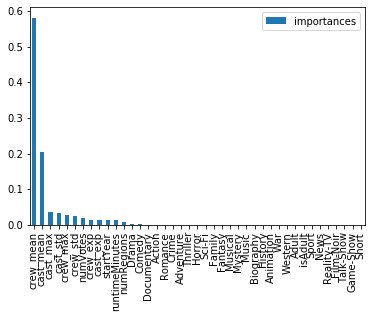

In [64]:
imp.plot.bar()